In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
def check_missing_value(df):
  missing_values = df.isnull().sum().sort_values(ascending=False)
  missing_percentage = (missing_values / len(df)) * 100
  result = pd.concat([missing_values, missing_percentage], axis=1, keys=['Missing values', '% Missing'])
  display(result)
check_missing_value(train)

,Missing values,% Missing
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


In [9]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
# Age의 결측치를 평균인 29로 대치
train['Age'].fillna(29, inplace=True)
# test data는 30
test['Age'].fillna(30, inplace=True)

In [11]:
# 성별을 숫자로 인코딩
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [13]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [14]:
print(train['Parch'].value_counts()[0] / train['Parch'].count())

0.7609427609427609


In [15]:
train_x = train[['Pclass', 'Sex', 'Age', 'SibSp']]
train_y = train['Survived']

In [16]:
test_x = test[['Pclass', 'Sex', 'Age', 'SibSp']]

In [17]:
model = DecisionTreeClassifier()
model.fit(train_x, train_y)

DecisionTreeClassifier()

In [18]:
test_y_pred = model.predict(test_x)

In [19]:
submission = pd.read_csv('submission.csv')
submission['Survived'] = test_y_pred
submission.to_csv('sample_submission.csv', index=False)



---






In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [22]:
cols_list = ['Pclass', 'Survived', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare']

,Pclass,Survived,Sex,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.338481,-0.131900,-0.334974,0.083081,0.018443,-0.549500
Survived,-0.338481,1.000000,0.543351,-0.067814,-0.035322,0.081629,0.257307
Sex,-0.131900,0.543351,1.000000,-0.082949,0.114631,0.245489,0.182333
Age,-0.334974,-0.067814,-0.082949,1.000000,-0.232978,-0.176486,0.093706
SibSp,0.083081,-0.035322,0.114631,-0.232978,1.000000,0.414838,0.159651
Parch,0.018443,0.081629,0.245489,-0.176486,0.414838,1.000000,0.216225
Fare,-0.549500,0.257307,0.182333,0.093706,0.159651,0.216225,1.000000


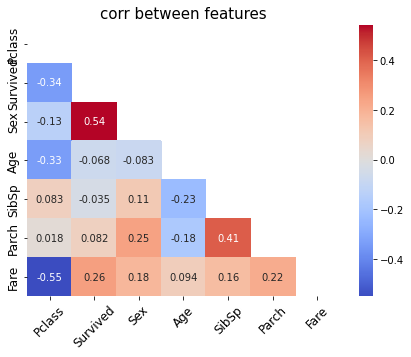

In [23]:
def corr_heat(df):
  plt.figure(figsize=(7, 5))

  corr_df = df.corr()
  display(corr_df)

  mask = np.zeros_like(corr_df)
  mask[np.triu_indices_from(mask)] = 1
  heat_map = sns.heatmap(corr_df, annot=True, mask=mask, cmap='coolwarm')
  heat_map.set_xticklabels(heat_map.get_xticklabels(), fontsize=12, rotation=45)
  heat_map.set_yticklabels(heat_map.get_yticklabels(), fontsize=12)
  plt.title('corr between features', fontsize=15)
  plt.show()

corr_heat(train[cols_list])

In [24]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [25]:
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

In [26]:
train2 = train.dropna(subset=['Embarked'])

In [27]:
train2.shape

(889, 12)

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
encoder = LabelEncoder()
train2['Embarked'] = encoder.fit_transform(train2['Embarked'])
train2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2


In [30]:
keys = encoder.classes_
values = encoder.transform(keys)
labels = dict(zip(keys, values))
labels

{'C': 0, 'Q': 1, 'S': 2}

In [31]:
test['Embarked'] = encoder.transform(test['Embarked'])

In [32]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,2


In [33]:
train2.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.350956,29.642093,0.524184,0.382452,32.096681,1.535433
std,256.998173,0.486260,0.834700,0.477538,14.492933,1.103705,0.806761,49.697504,0.792088
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,0.000000,20.000000,0.000000,0.000000,7.895800,1.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,668.000000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
train2['Fare2'] = scaler.fit_transform(train2[['Fare']])
train2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare2
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2,-0.500240
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0,0.788947
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,-0.486650
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2,0.422861
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2,-0.484133


In [36]:
test['Fare2'] = scaler.transform(test[['Fare']])
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare2
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,1,-0.488579
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,2,-0.505273
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,1,-0.451165
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,2,-0.471802
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,2,-0.398819


In [37]:
train2.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare2
count,889.000000,889.000000,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000,889.000000,8.890000e+02
mean,446.000000,0.382452,2.311586,0.350956,29.642093,0.524184,0.382452,32.096681,1.535433,1.092115e-16
std,256.998173,0.486260,0.834700,0.477538,14.492933,1.103705,0.806761,49.697504,0.792088,1.000563e+00
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,-6.462044e-01
25%,224.000000,0.000000,2.000000,0.000000,20.000000,0.000000,0.000000,7.895800,1.000000,-4.872378e-01
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,2.000000,-3.551972e-01
75%,668.000000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,2.000000,-2.207954e-02
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,9.668551e+00


In [38]:
test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare2
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000,417.000000
mean,1100.500000,2.265550,0.363636,30.272590,0.447368,0.392344,35.627188,1.401914,0.071080
std,120.810458,0.841838,0.481622,14.181209,0.896760,0.981429,55.907576,0.854496,1.125591
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,-0.646204
25%,996.250000,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800,1.000000,-0.487238
50%,1100.500000,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200,2.000000,-0.355197
75%,1204.750000,3.000000,1.000000,39.000000,1.000000,0.000000,31.500000,2.000000,-0.012013
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000,9.668551


In [50]:
def check_missing_value(df):
  missing_values = df.isnull().sum().sort_values(ascending=False)
  missing_percentage = (missing_values / len(df)) * 100
  result = pd.concat([missing_values, missing_percentage], axis=1, keys=['Missing values', '% Missing'])
  display(result)
check_missing_value(test)

,Missing values,% Missing
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234
Fare2,1,0.239234
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


In [45]:
X_train = train2.drop(["PassengerId", "Survived", "Name", "Ticket", "Cabin", "Age", "Fare"], axis=1)
Y_train = train2["Survived"]
X_test = test.drop(["PassengerId", "Name", "Ticket", "Cabin", "Age", "Fare"], axis=1)
X_train.shape, Y_train.shape, X_test.shape

((889, 6), (889,), (418, 6))

In [51]:
X_test = X_test.fillna(X_test.mean())

In [52]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [53]:
sample_submission = pd.read_csv('submission.csv')

In [54]:
sample_submission['Survived'] = Y_pred
sample_submission.to_csv('sample_submission.csv', index=False)